<a href="https://colab.research.google.com/github/simsekahmet/Power_spectral_denstiy/blob/main/PSD_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np

def find_period(y, Fs):
  """
    This function finds natural period and power spectral density of measured data.

    Parameters:
        y : Measured data (list, numpy.ndarray, pandas.DataFrame)
        Fs : Sampling frequency (int, float)

    Returns:
        1. Natural frequency and period value
        2. Power spectral density of measured data

    Example:
        y = np.loadtxt("N.txt")
        Fs = 100
        find_period(y, Fs)

    Notes:
        **Written by ahmetsimsek**
  """
  (f, S)= scipy.signal.welch(y, Fs, nperseg=1024)

  i = np.where([S == max(S)])
  freq = f[i[1][0]]
  period = 1/freq
  print(f"Frequency (Hz): {round(freq, 3)} \nPeriod (sec.): {round(period, 3)}")

  freq_list = [freq,freq]
  PSD_list = [min(S), 1]
  plt.semilogy(f, S, '-k')
  plt.plot(freq_list, PSD_list, '-k', linewidth = 0.8)
  plt.ylim([min(S), 1])
  plt.xlim(0.1, max(f))
  plt.xlabel('Frequency [Hz]')
  plt.ylabel('PSD [(m/s)^2/Hz]')
  plt.title("Power Spectrum")
  plt.text(freq+1, max(S), f"Frequency [Hz]: {round(freq, 3)} \nPeriod [sn.]: {round(period, 3)}", fontdict=None);

  plt.savefig('spectrum_n.eps', format='eps')

Frequency (Hz): 1.367 
Period (sec.): 0.731


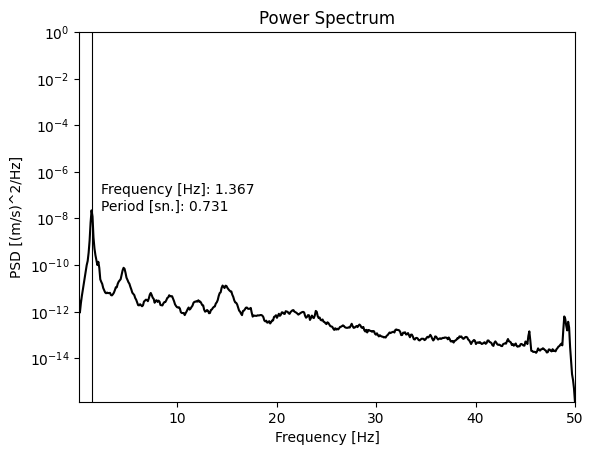

In [44]:
y = np.loadtxt("N.txt")
Fs = 100
find_period(y, Fs)